# Generating 2D Conformation Using RDKit

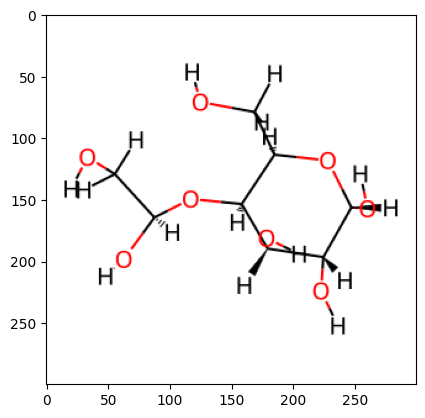

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Load sucrose from SMILES
sucrose_smiles = "OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O[C@H](CO)O"
mol = Chem.MolFromSmiles(sucrose_smiles)

# Generate 3D coordinates
mol_3d = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol_3d, randomSeed=42)

# Draw 3D structure
from rdkit.Chem import Draw

img = Draw.MolToImage(mol_3d, size=(300, 300))
plt.imshow(img)

# Visualizing in 3D Space

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert RDKit molecule to 3Dmol JSON format
sucrose_smiles = "OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O[C@H](CO)O"
mol = Chem.MolFromSmiles(sucrose_smiles)
mol_3d = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol_3d, randomSeed=42)

# Convert to a 3Dmol.js compatible format
block = Chem.MolToMolBlock(mol_3d)
block[:50]

'\n     RDKit          3D\n\n 32 32  0  0  0  0  0  0 '

In [33]:
import py3Dmol

# Initialize Py3Dmol view
view = py3Dmol.view(width=800, height=400)

# Add molecule model
view.addModel(block, "sdf")

# Set styles
view.setStyle({"stick": {}})
# view.setStyle({'sphere': {'color': 'red', 'scale': 0.4}})
# view.setStyle({'stick': {'color': 'gray', 'radius': 0.2}})
# view.setStyle({'stickAndBall': {'stick': {'color': 'orange'}, 'ball': {'color': 'blue'}}})
# view.setStyle({'label': {'text': 'Atom', 'color': 'black'}})


# Render the visualization
view.setBackgroundColor("white")
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
from rdkit.Chem import AllChem

# Generate 3D coordinates and save to a file
AllChem.EmbedMolecule(mol_3d, randomSeed=42)
AllChem.MolToPDBFile(mol_3d, "sucrose.pdb")

# Conformation of bacteriorhodopsin

In [36]:
# Import necessary libraries
import py3Dmol
import requests

# Download the PDB file for bacteriorhodopsin from the Protein Data Bank
pdb_id = "1F88"
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
response = requests.get(url)

# Save the PDB file locally
with open(f"{pdb_id}.pdb", "w") as file:
    file.write(response.text)

# Read the PDB file into a string
pdb_data = response.text
pdb_data[:100]

'HEADER    SIGNALING PROTEIN                       29-JUN-00   1F88              \nTITLE     CRYSTAL S'

In [37]:
# Create a 3Dmol view in the Jupyter Notebook
view = py3Dmol.view(width=800, height=400)

# Add the PDB model to the view
view.addModel(pdb_data, "pdb")

# Style the visualization
# view.setStyle({'stick': {}})
view.setBackgroundColor("white")

# Add a cartoon style representation
view.addStyle({"cartoon": {"color": "spectrum"}})

# Zoom to fit the structure
view.zoomTo()

# Show the visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.